In [1]:
import json
import os
import numpy as np
import pandas as pd
POWERS = ['AUSTRIA', 'ENGLAND', 'FRANCE', 'GERMANY', 'ITALY', 'RUSSIA', 'TURKEY']
POWER_MAPPING = {
    'AUSTRIA': 0,
    'ENGLAND': 1,
    'FRANCE': 2,
    'GERMANY': 3,
    'ITALY': 4,
    'RUSSIA': 5,
    'TURKEY': 6
}

number_of_games_played = {'AIGame_0': {'GERMANY': 1, 'FRANCE': 1},
 'AIGame_1': {'RUSSIA': 1, 'TURKEY': 2, 'FRANCE': 1},
 'AIGame_2': {'RUSSIA': 1, 'TURKEY': 2, 'FRANCE': 1},
 'AIGame_3': {'RUSSIA': 1, 'TURKEY': 1, 'FRANCE': 1},
 'AIGame_4': {'RUSSIA': 1, 'FRANCE': 2, 'TURKEY': 1},
 'AIGame_5': {'ENGLAND': 3, 'FRANCE': 1, 'TURKEY': 1},
 'AIGame_6': {'TURKEY': 3, 'RUSSIA': 1},
 'AIGame_7': {'AUSTRIA': 4, 'GERMANY': 2, 'FRANCE': 3},
 'AIGame_8': {'GERMANY': 5, 'FRANCE': 3},
 'AIGame_9': {'TURKEY': 6, 'ITALY': 4, 'FRANCE': 2, 'GERMANY': 1},
 'AIGame_10': {'ITALY': 7, 'GERMANY': 3, 'AUSTRIA': 2},
 'AIGame_11': {'ITALY': 4, 'AUSTRIA': 4, 'GERMANY': 1, 'FRANCE': 1},
 'AIGame_12': {'GERMANY': 8, 'AUSTRIA': 5, 'ITALY': 5, 'FRANCE': 1},
 'AIGame_13': {'GERMANY': 6, 'FRANCE': 2, 'TURKEY': 4},
 'AIGame_14': {'RUSSIA': 7, 'TURKEY': 2},
 'AIGame_15': {'GERMANY': 8, 'FRANCE': 3},
 'AIGame_16': {'TURKEY': 1, 'AUSTRIA': 1},
 'AIGame_17': {'AUSTRIA': 2, 'ITALY': 2, 'FRANCE': 1, 'GERMANY': 1},
 'AIGame_18': {'AUSTRIA': 2, 'GERMANY': 3},
 'AIGame_19': {'AUSTRIA': 4, 'TURKEY': 1, 'ITALY': 9},
 'AIGame_20': {'ENGLAND': 1, 'RUSSIA': 1, 'TURKEY': 1},
}

def bot_players(data):
    """
    get all cicero players in the game

    :param data: dictionary of game data after json.load
    :return: a list of powers that has cicero prefix usernames
    """
    bots = []
    all_powers = data['powers']

    for power in POWERS:
        power_controllers = all_powers[power]['controller']

        for controller in power_controllers.values():
            if controller not in bots and controller.startswith('cicero'):
                bots.append(power)
    return bots

def human_players(data):
    """
    get all human players in the game

    :param data: dictionary of game data after json.load
    :return: a list of powers that does not have cicero prefix usernames
    """
    bots = bot_players(data)
    humans = []

    for power in POWERS:
        if power not in bots:
            humans.append(power)
    return humans

game_dir = 'games/'
games = list(map(lambda x: game_dir + x, filter(lambda x: x.endswith('.json'), os.listdir(game_dir))))
games = sorted(games, key=lambda x: x)

X = []
Y = []
cicero_x = []
cicero_y = []
human_x = []
human_y = []

for game in games:
    with open(game, 'r') as f:
        data = json.load(f)
    human_powers = human_players(data)
    id = data['game_id']
    humans = number_of_games_played[id]

    for power in POWERS:
        scs = data['powers'][power]['centers']

        # player_type feature
        Y.append(len(scs))

        if power not in humans:
            X.append(0)
        else:
            if humans[power] < 2:
                X.append(1)
            else:
                X.append(2)

        # cicero power feature
        if power not in human_powers:
            cicero_x.append(POWER_MAPPING[power])
            cicero_y.append(len(scs))
        else:
            human_x.append(POWER_MAPPING[power])
            human_y.append(len(scs))


data = pd.DataFrame({
    'type_of_power': X,
    'supply_centers': Y
})
X = pd.get_dummies(data['type_of_power'], prefix='power_type')

cicero_data = pd.DataFrame({
    'power': cicero_x,
    'supply_centers': cicero_y
})
cicero_x = pd.get_dummies(cicero_data['power'], prefix='power')

human_data = pd.DataFrame({
    'power': human_x,
    'supply_centers': human_y
})
human_x = pd.get_dummies(human_data['power'], prefix='power')

print(human_y)

[11, 9, 10, 2, 0, 0, 0, 0, 5, 9, 4, 0, 0, 0, 0, 10, 8, 6, 0, 0, 0, 8, 11, 5, 2, 0, 2, 0, 0, 0, 3, 0, 7, 0, 8, 2, 3, 1, 3, 1, 1, 4, 3, 4, 3, 0, 6, 8, 1, 4, 0, 0, 8, 6, 8, 8, 9, 5, 6, 3]


AUS: -1.9072278658883561
ENG: 0.06957910058373215
FRA: 3.097410740817228
GER: 1.2206712633026318
ITA: 0.37517312932194136
RUS: -0.7211774304838513
TUR: -2.1344289376532934


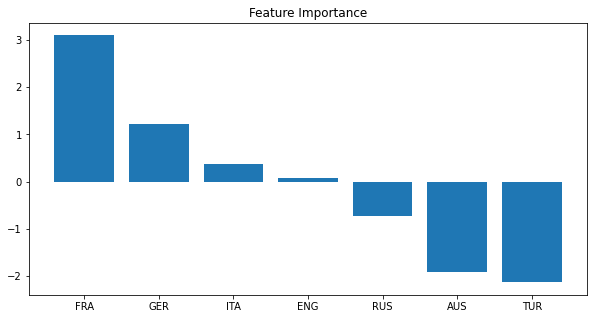

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

def final_feature_importance():

    lin_reg = Ridge(alpha=1.0)

    lin_reg.fit(X, Y)

    feature_weights = lin_reg.coef_

    feature_names = [
        'cicero', 'in_first_game', 'more_than_once'
    ]

    print(feature_weights)

    feature_weights_dict = {feature_names[i]: feature_weights[i] for i in range(len(feature_names))}

    for feature, weight in feature_weights_dict.items():
        print(f"{feature}: {weight}")

    indices = np.argsort(feature_weights)[::-1]

    sorted_feature_names = [feature_names[i] for i in indices]

    plt.figure(figsize=(10,5))

    plt.title("Feature Importance")

    plt.bar(range(X.shape[1]), feature_weights[indices])

    plt.xticks(range(X.shape[1]), sorted_feature_names)

    plt.show()

def cicero_power_feature_importance():
    lin_reg = Ridge(alpha=1.0)

    lin_reg.fit(cicero_x, cicero_y)

    feature_weights = lin_reg.coef_

    feature_names = [x[:3] for x in POWERS]

    feature_weights_dict = {feature_names[i]: feature_weights[i] for i in range(len(feature_names))}

    for feature, weight in feature_weights_dict.items():
        print(f"{feature}: {weight}")

    indices = np.argsort(feature_weights)[::-1]

    sorted_feature_names = [feature_names[i] for i in indices]

    plt.figure(figsize=(10,5))

    plt.title("Feature Importance")

    plt.bar(range(cicero_x.shape[1]), feature_weights[indices])

    plt.xticks(range(cicero_x.shape[1]), sorted_feature_names)

    plt.show()

def human_power_feature_importance():
    lin_reg = Ridge(alpha=1.0)

    lin_reg.fit(human_x, human_y)

    feature_weights = lin_reg.coef_

    feature_names = [x[:3] for x in POWERS]

    feature_weights_dict = {feature_names[i]: feature_weights[i] for i in range(len(feature_names))}

    for feature, weight in feature_weights_dict.items():
        print(f"{feature}: {weight}")

    indices = np.argsort(feature_weights)[::-1]

    sorted_feature_names = [feature_names[i] for i in indices]

    plt.figure(figsize=(10,5))

    plt.title("Feature Importance")

    plt.bar(range(human_x.shape[1]), feature_weights[indices])

    plt.xticks(range(human_x.shape[1]), sorted_feature_names)

    plt.show()


def main():
    #final_feature_importance()
    human_power_feature_importance()

if __name__ == '__main__':
    main()